In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallaellaithy/330k-arabic-sentiment-reviews")

print("Path to dataset files:", path)


100%|██████████| 64.3M/64.3M [00:02<00:00, 26.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abdallaellaithy/330k-arabic-sentiment-reviews/versions/1


In [ ]:
import pandas as pd
import os

# Your download code
import kagglehub
path = kagglehub.dataset_download("abdallaellaithy/330k-arabic-sentiment-reviews")

print("Path to dataset files:", path)

# List files in the directory to find the CSV name
print(os.listdir(path))

# Load the dataset (assuming the file is named 'data.csv' or similar—check the print output above)
# Replace 'unbalanced_reviews.csv' or 'balanced_reviews.csv' with the actual filename found
csv_file = os.path.join(path, os.listdir(path)[0])
df = pd.read_csv(csv_file, sep='\t') # Use sep=',' if it looks weird, but often these are tab-separated

# Inspect the first few rows
print(df.head())
print(df.info())

Using Colab cache for faster access to the '330k-arabic-sentiment-reviews' dataset.
Path to dataset files: /kaggle/input/330k-arabic-sentiment-reviews
['arabic_sentiment_reviews.csv']
                                       label,content
0  1,النعال المريحة: أرتدي هذه النعال كثيرًا!فهي ...
1  1,منتج جميل ، خدمة سيئة: لقد اشتريت زوجًا من ا...
2  1,جيد للأشياء الصغيرة: هذا يعمل بشكل جيد لالتق...
3  0,واهية للغاية: flimsyif للغاية ، فأنت تشتريه ...
4  1,Pop for Girls and Girly Boys ، والأشخاص الذي...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330000 entries, 0 to 329999
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   label,content  330000 non-null  object
dtypes: object(1)
memory usage: 2.5+ MB
None


In [ ]:
import pandas as pd
import os

# 1. Define the correct path to your CSV file
path = '/kaggle/input/330k-arabic-sentiment-reviews/arabic_sentiment_reviews.csv'

# 2. Load the dataset specifying the separator as a comma
# The engine='python' is safer if there are any parsing errors
df = pd.read_csv(path, sep=',', engine='python')

# 3. Check the result - you should now see TWO columns: 'label' and 'content'
print("Columns found:", df.columns)
print(df.head())

Columns found: Index(['label', 'content'], dtype='object')
   label                                            content
0      1  النعال المريحة: أرتدي هذه النعال كثيرًا!فهي دا...
1      1  منتج جميل ، خدمة سيئة: لقد اشتريت زوجًا من الن...
2      1  جيد للأشياء الصغيرة: هذا يعمل بشكل جيد لالتقاط...
3      0  واهية للغاية: flimsyif للغاية ، فأنت تشتريه ، ...
4      1  Pop for Girls and Girly Boys ، والأشخاص الذين ...


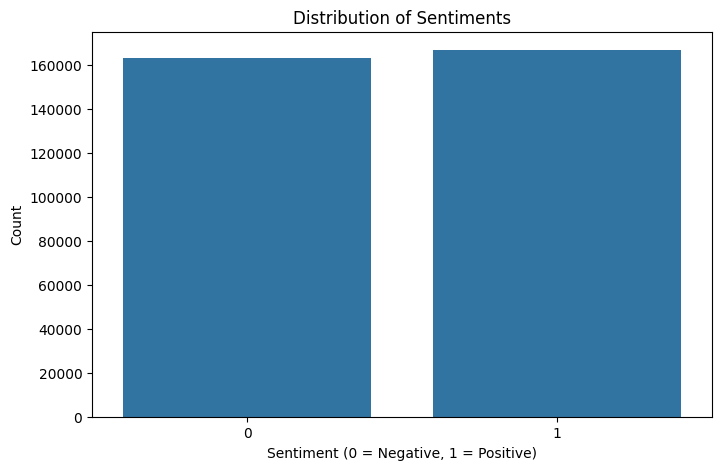

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# The column name is 'label' (0 for Negative, 1 for Positive)
plt.figure(figsize=(8, 5))
sns.countplot(x=df['label'])

plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

In [ ]:
import re

def clean_arabic_text(text):
    # 1. Normalize Alef (أ, إ, آ -> ا)
    text = re.sub(r'[أإآ]', 'ا', text)

    # 2. Normalize Alef Maqsura (ى -> ي) - Optional, helps match varied spellings
    text = re.sub(r'ى', 'ي', text)

    # 3. Normalize Ta Marbuta (ة -> ه)
    text = re.sub(r'ة', 'ه', text)

    # 4. Remove Diacritics (Tashkeel - Fatha, Damma, etc.)
    text = re.sub(r'[\u064B-\u065F]', '', text)

    # 5. Replace dots with whitespace
    text = re.sub(r'\.', ' ', text)

    # 6. Remove other non-Arabic characters (punctuation, numbers, English) except whitespace
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    # 7. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function to the 'content' column
print("Cleaning text... this might take a moment.")
df['cleaned_content'] = df['content'].apply(str).apply(clean_arabic_text)

# Check the difference
print("Original:", df['content'].iloc[0])
print("Cleaned: ", df['cleaned_content'].iloc[0])

Cleaning text... this might take a moment.
Original: النعال المريحة: أرتدي هذه النعال كثيرًا!فهي دافئة ومريحة وبأسعار معقولة لجودة رائعة.زوجي وأنا على حد سواء لدينا زوج ونحن نحبهم!
Cleaned:  النعال المريحه ارتدي هذه النعال كثيرافهي دافئه ومريحه وباسعار معقوله لجوده رائعه زوجي وانا علي حد سواء لدينا زوج ونحن نحبهم


In [ ]:
import nltk
import re # Import re module if not already imported
from nltk.stem.isri import ISRIStemmer

# Initialize the stemmer
st = ISRIStemmer()

def clean_and_stem(text):
    # 1. Your existing cleaning (Normalization)

     # 1.1 Normalize Alef (أ, إ, آ -> ا)
    text = re.sub(r'[أإآ]', 'ا', text)

    # 1.2 Normalize Alef Maqsura (ى -> ي) - Optional, helps match varied spellings
    text = re.sub(r'ى', 'ي', text)

    # 1.3 Normalize Ta Marbuta (ة -> ه)
    text = re.sub(r'ة', 'ه', text)

    # 1.4 Remove Diacritics (Tashkeel - Fatha, Damma, etc.)
    text = re.sub(r'[\u064B-\u065F]', '', text)

    # 1.5 Replace punctuation characters with a space
    # This pattern covers common ASCII punctuation and some general Unicode punctuation. Arabic punctuation is also included.
    text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~،؛؟ -⁯⸀-⹿　-〿]', ' ', text)

    # 1.6 Remove other non-Arabic characters (numbers, English letters) except whitespace
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    # 1.7 Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()


    # 2. Tokenization & Stemming
    # Split string into list of words -> Stem each word -> Join back to string
    words = text.split()
    stemmed_words = [st.stem(word) for word in words]

    return " ".join(stemmed_words)

# Apply the new function
print("Applying Stemming... this will take a bit longer.")
df['stemmed_content'] = df['content'].apply(str).apply(clean_and_stem)

# Compare Before vs After
print("\n--- Comparison --")
print("Original:", df['content'].iloc[0])
print("Stemmed: ", df['stemmed_content'].iloc[0])

Applying Stemming... this will take a bit longer.

--- Comparison --
Original: النعال المريحة: أرتدي هذه النعال كثيرًا!فهي دافئة ومريحة وبأسعار معقولة لجودة رائعة.زوجي وأنا على حد سواء لدينا زوج ونحن نحبهم!
Stemmed:  نعل ريح ردي هذه نعل كثر فهي دفئ ريح سعر عقل لجد رئع زوج ونا علي حد سوء لدي زوج ونح نحب


In [ ]:
from sklearn.model_selection import train_test_split

X = df['cleaned_content'] # Features (Text)
y = df['label']           # Target (0 or 1)

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 264000
Testing samples: 66000


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Hyperparameters
vocab_size = 20000    # Keep only the top 20,000 most frequent words
max_length = 100      # Cut off reviews after 100 words
embedding_dim = 64    # Size of the vector representing each word
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"     # Token for words not in the vocabulary

# 1. Initialize Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# Fit on the training text ONLY to avoid data leakage
# Assuming 'cleaned_content' is your text column name
tokenizer.fit_on_texts(df['cleaned_content'])

# 2. Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(df['cleaned_content'])

# 3. Pad sequences to ensure uniform length
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(padded, df['label'], test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (264000, 100)
Shape of X_test: (66000, 100)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, SpatialDropout1D

def build_model(model_type='lstm'):
    model = Sequential()
    # Embedding Layer: Turns integers into dense vectors
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(SpatialDropout1D(0.2)) # Prevents overfitting

    # The Core Layer (RNN, LSTM, or GRU)
    if model_type == 'rnn':
        model.add(SimpleRNN(64, return_sequences=False))
    elif model_type == 'lstm':
        model.add(LSTM(64, return_sequences=False))
    elif model_type == 'gru':
        model.add(GRU(64, return_sequences=False))

    # Output Layer
    model.add(Dense(1, activation='sigmoid')) # Binary classification (0 or 1)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Dictionary to store results
results = {}
model_types = ['rnn', 'lstm', 'gru']
batch_size = 128
epochs = 3 # Keep it low for demonstration (increase to 5-10 for better results)

for m_type in model_types:
    print(f"\nTraining {m_type.upper()} Model...")
    model = build_model(m_type)

    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_test, y_test),
                        verbose=1)

    results[m_type] = model # Save the trained model
    results[f'{m_type}_history'] = history # Save the history for plotting


Training RNN Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 147s 69ms/step - accuracy: 0.7289 - loss: 0.5357 - val_accuracy: 0.7583 - val_loss: 0.5477
Epoch 2/3
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 128s 62ms/step - accuracy: 0.7663 - loss: 0.5091 - val_accuracy: 0.7671 - val_loss: 0.5017
Epoch 3/3
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 126s 61ms/step - accuracy: 0.7825 - loss: 0.4789 - val_accuracy: 0.7694 - val_loss: 0.5032

Training LSTM Model...
Epoch 1/3
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 376s 181ms/step - accuracy: 0.6049 - loss: 0.6448 - val_accuracy: 0.7501 - val_loss: 0.5525
Epoch 2/3
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 373s 181ms/step - accuracy: 0.8585 - loss: 0.3375 - val_accuracy: 0.9042 - val_loss: 0.2360
Epoch 3/3
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 376s 182ms/step - accuracy: 0.9207 - loss: 0.2044 - val_accuracy: 0.9095 - val_loss: 0.2264

Training GRU Model...
Epoch 1/3
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 422s 203ms/step - accuracy: 0.6306 - loss: 0.6102 - val_accuracy: 0.8638 - val_loss: 0.3188
Epoch 2/3
2063/2063 ━━━━━

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

metrics_data = []

for m_type in model_types:
    model = results[m_type]

    # Predict probabilities
    y_pred_prob = model.predict(X_test)
    # Convert probabilities to binary (0 or 1)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store relevant metrics
    metrics_data.append({
        'Model': m_type.upper(),
        'Accuracy': report['accuracy'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1-Score (1)': report['1']['f1-score']
    })

# Create a DataFrame for comparison
metrics_df = pd.DataFrame(metrics_data)
print("\nModel Comparison Table:")
print(metrics_df)

2063/2063 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step

Model Comparison Table:
  Model  Accuracy  Precision (1)  Recall (1)  F1-Score (1)
0   RNN  0.769439       0.764625    0.784221      0.774299
1  LSTM  0.909455       0.900199    0.922756      0.911338
2   GRU  0.902712       0.896689    0.912180      0.904368


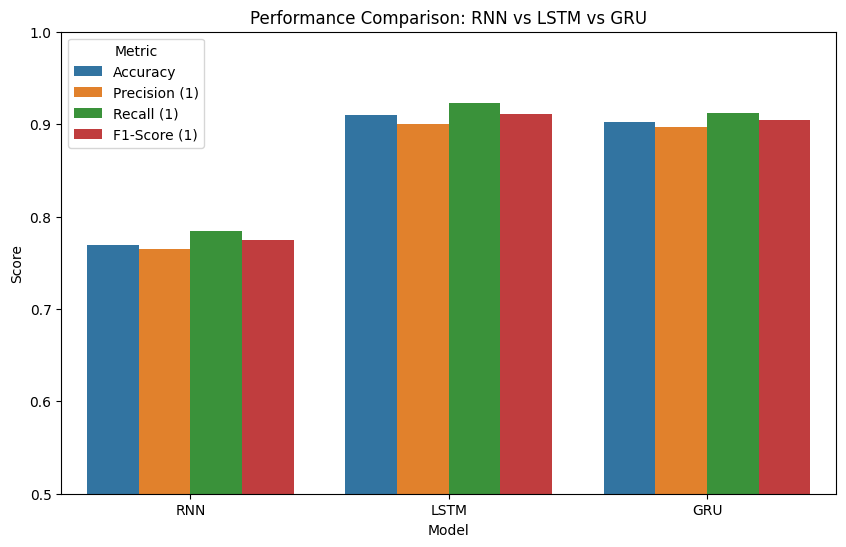

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape data for plotting
df_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=df_melted)
plt.title("Performance Comparison: RNN vs LSTM vs GRU")
plt.ylim(0.5, 1.0) # Zoom in on the top half since scores will likely be high
plt.show()